In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_row",10000)
pd.set_option("display.max_columns",20)
pd.set_option("display.width",10000)

In [7]:
dataset = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/Churn_Modelling.csv')

In [8]:
dataset.isnull().sum()

#There are no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
dataset = dataset.drop(columns=['RowNumber','CustomerId','Surname'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
dataset['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [12]:
dataset =  pd.get_dummies(data=dataset, columns=['Geography'], drop_first=True)
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int8   
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), int8(1), uint8(2)
memory usage: 732.5 KB


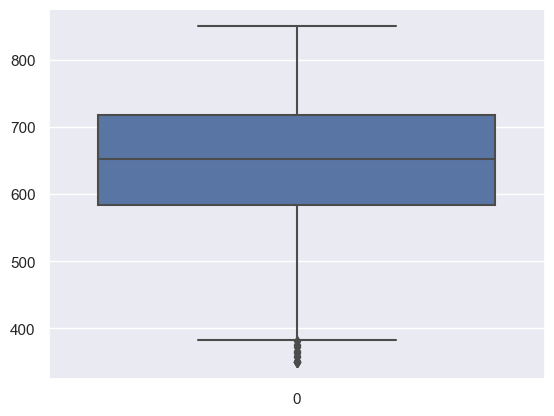

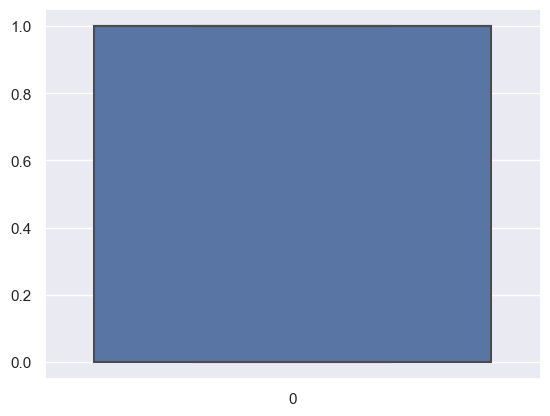

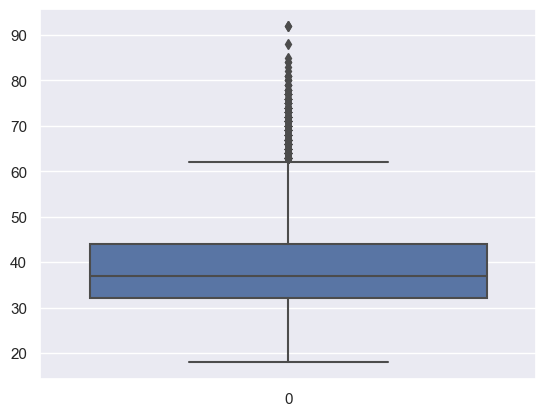

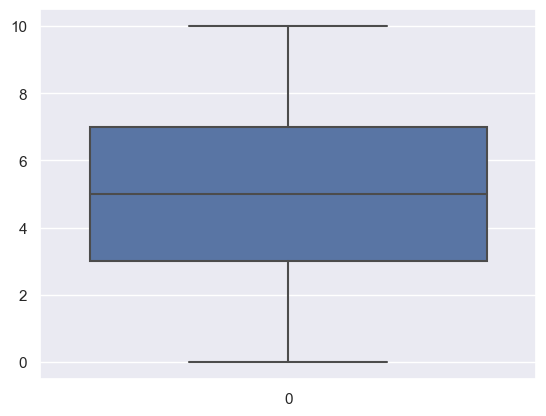

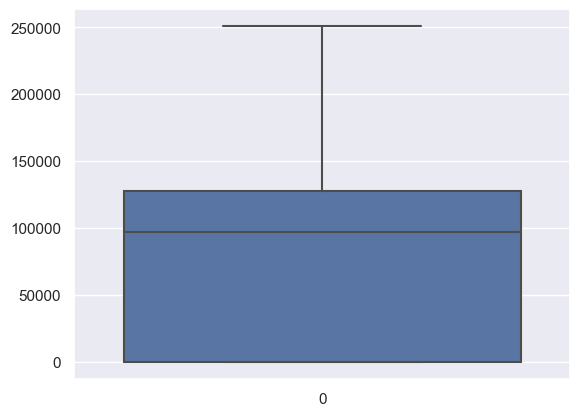

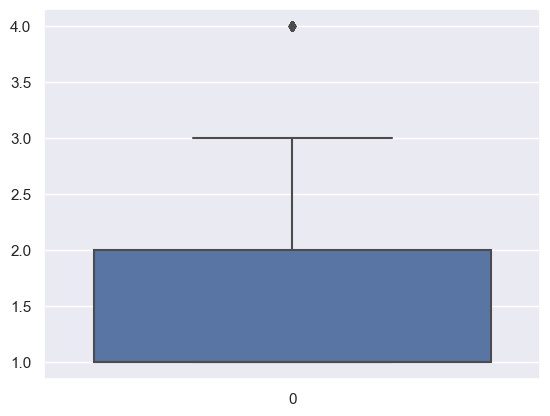

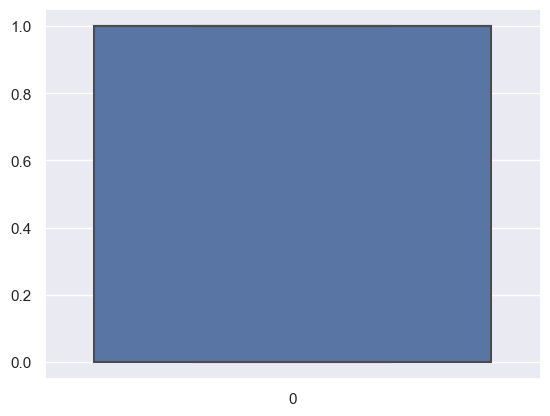

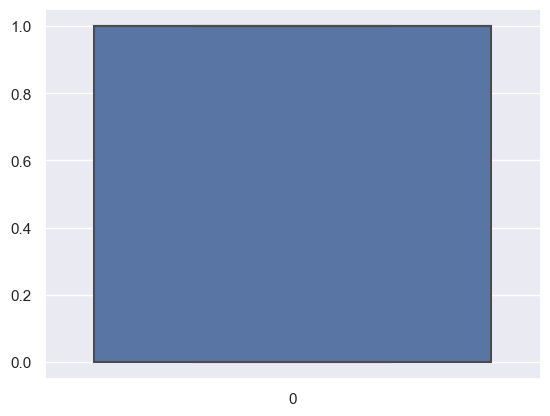

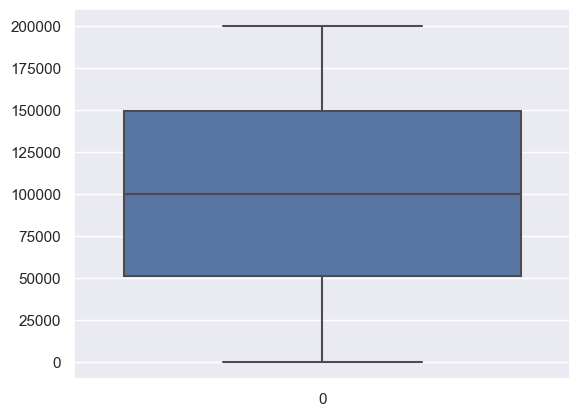

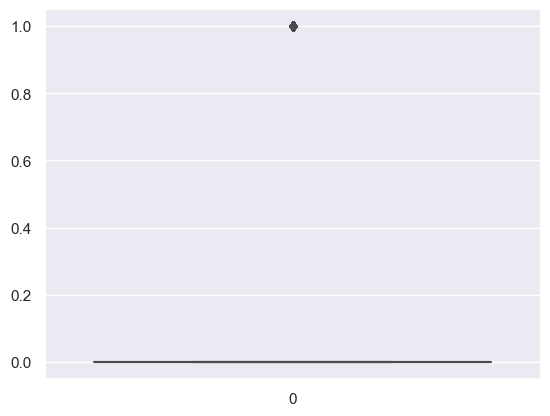

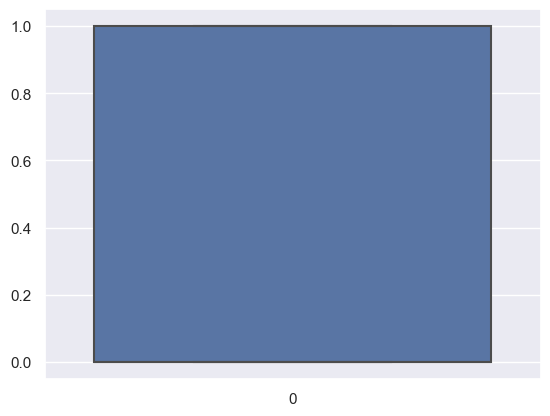

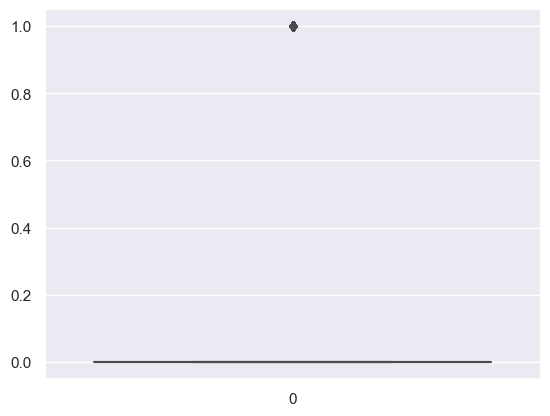

In [26]:
# Check outliers
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

## Feature Scaling

In [30]:
print(dataset.columns)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'], dtype='object')


In [32]:
x = dataset.drop(columns=['Exited'])
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [37]:
y=dataset['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x1 = sc.fit_transform(x)
pd.DataFrame(x1).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740


## Imbalance treatment

In [39]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

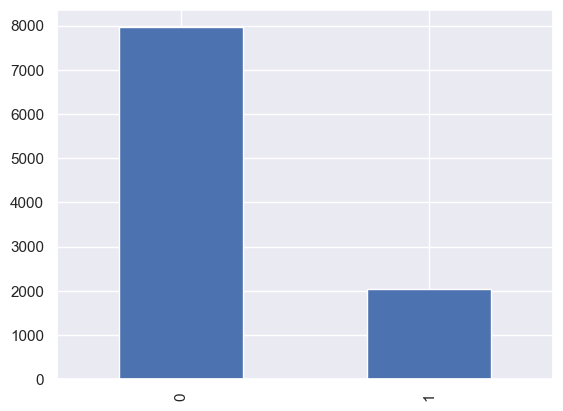

In [45]:
y.value_counts().plot(kind='bar')

In [47]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(X=x1, y=y)
print(x_sam.shape, y_sam.shape, y.shape)

(15926, 11) (15926,) (10000,)


In [51]:
y_sam.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [54]:
display(dataset.corr())

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


<Axes: >

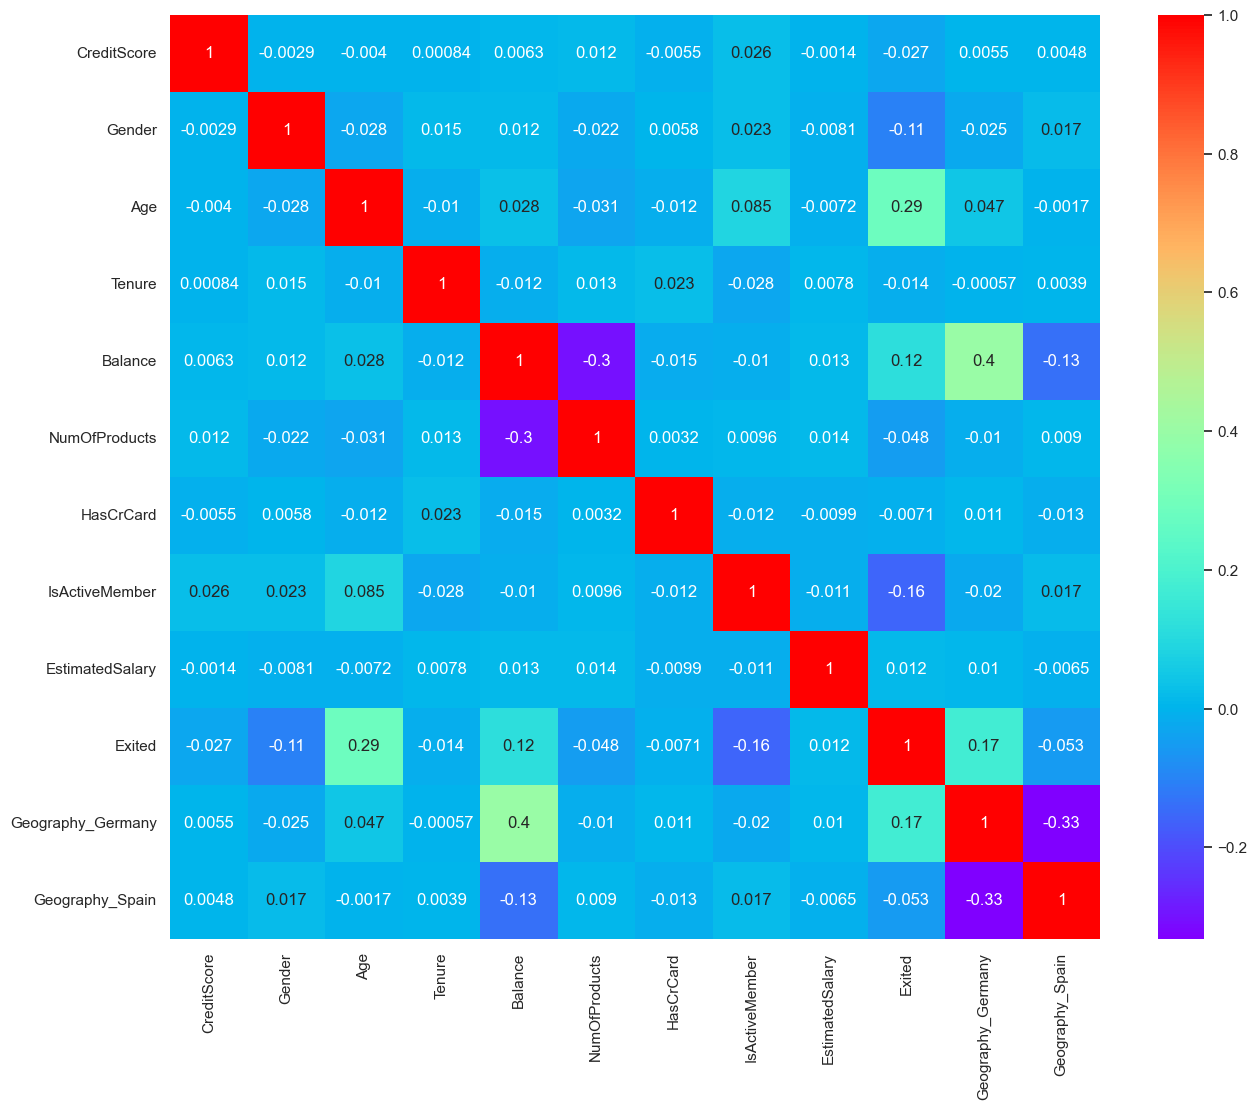

In [55]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x1

vif = pd.DataFrame()
vif['variance inflation factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns

vif
#All values below are less than 5, so no multicollinearity found

,variance inflation factor,Features
0,1.001046,CreditScore
1,1.003207,Gender
2,1.012064,Age
3,1.001935,Tenure
4,1.336461,Balance
5,1.122391,NumOfProducts
6,1.001580,HasCrCard
7,1.010516,IsActiveMember
8,1.000936,EstimatedSalary
9,1.339719,Geography_Germany


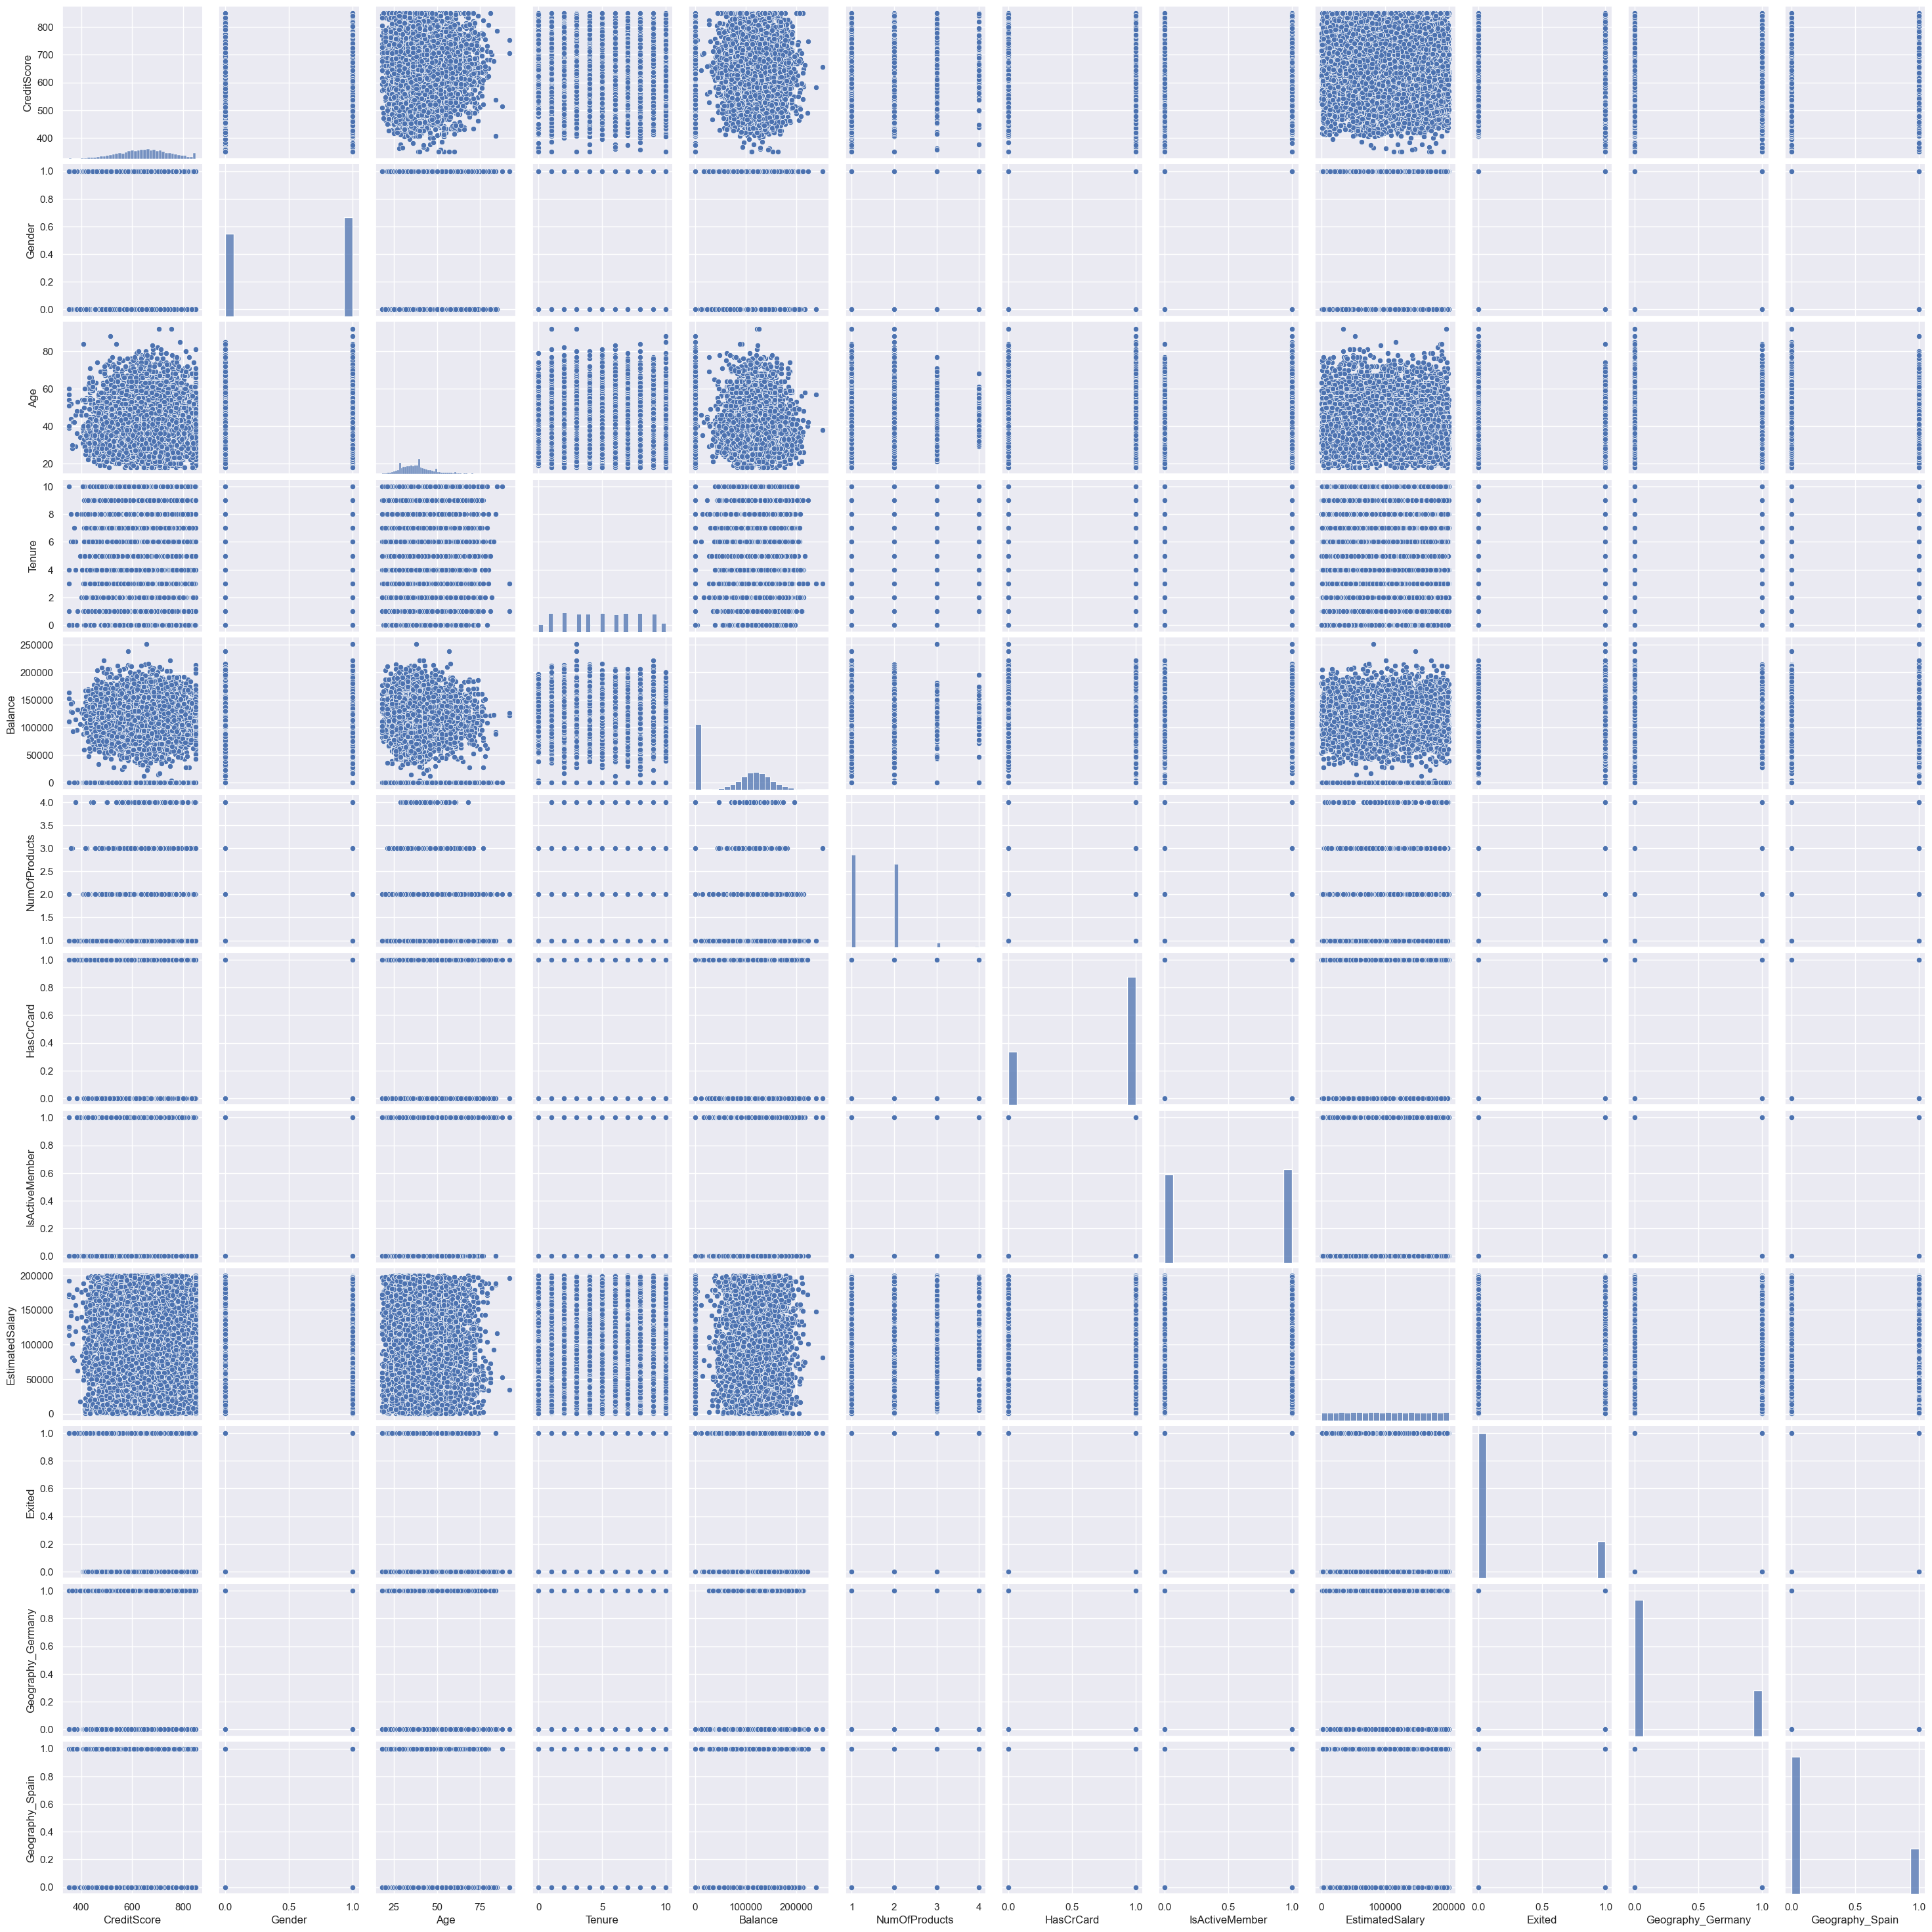

In [57]:
sns.pairplot(dataset)

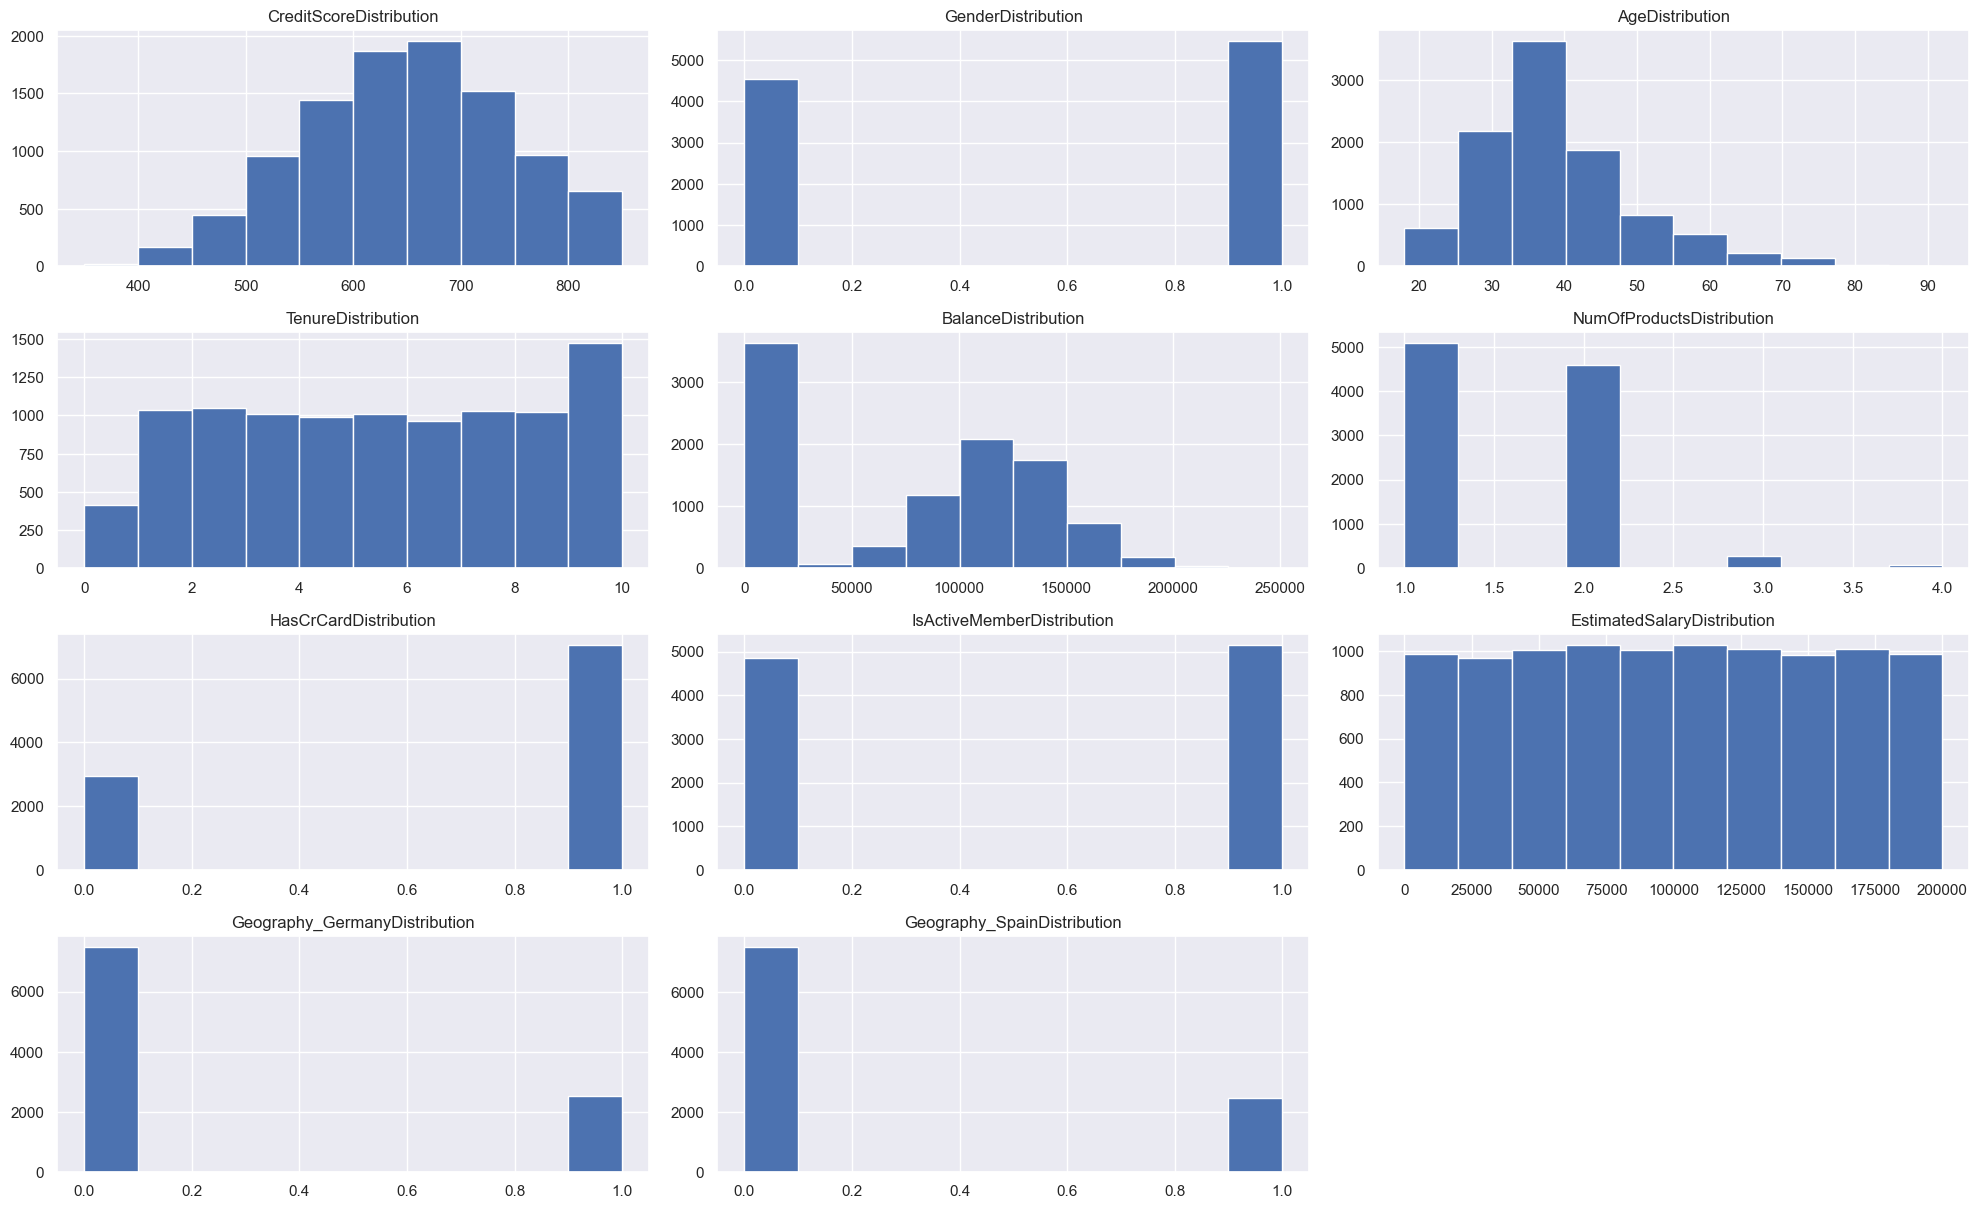

In [58]:
def histograms(dataset, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20,15))
    for i , var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name +"Distribution")
    fig.tight_layout()
    plt.show()
    
histograms(dataset, x, 5,3)

## Model building and validation

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, stratify=y_sam, test_size=0.25, random_state=101)



### Bagging method

In [62]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [63]:
#Prediction
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_train, y_pred_train_bgg))
print()
print(confusion_matrix(y_test, y_pred_test_bgg))

[[5958   14]
 [  14 5958]]

[[1798  193]
 [  51 1940]]


In [65]:
print(classification_report(y_train, y_pred_train_bgg))
print()
print(classification_report(y_test, y_pred_test_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944


              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1991
           1       0.91      0.97      0.94      1991

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982



In [66]:
print('Training accuracy: ',accuracy_score(y_train, y_pred_train_bgg))
print()
print('Test accuracy: ',accuracy_score(y_test, y_pred_test_bgg))

Training accuracy:  0.9976557267247154

Test accuracy:  0.9387242591662481


### Random forest method

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [68]:
# Prediction
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [69]:
print(confusion_matrix(y_train, y_pred_train_rf))

print(confusion_matrix(y_test, y_pred_test_rf))

[[5972    0]
 [   0 5972]]
[[1823  168]
 [  33 1958]]


In [71]:
print(classification_report(y_test, y_pred_test_rf))
print()
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1991
           1       0.92      0.98      0.95      1991

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



In [72]:
print(accuracy_score(y_test, y_pred_test_rf))
print()
print(accuracy_score(y_train, y_pred_train_rf))

0.9495228528377699

1.0


### Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(rf, x_train, y_train, cv=10)
accuracy.mean()

0.9413917565512359

In [74]:
print("Trainging Accuracy : ", accuracy.mean())
print()
print("Test Accuracy: ",accuracy_score(y_test, y_pred_test_rf))

Trainging Accuracy :  0.9413917565512359

Test Accuracy:  0.9495228528377699
